In [ ]:
'''  
Alcuni articoli sono solo \\N
Alcuni titoli differiscono solo per gli spazi
Alcuni articoli sono "deck"
Alcuni articoli sono "to"  
Alcuni articoli sono vuoti
vectorizer aggiusta già ma ci serve per preprocessing

Eliminando i duplicati degli articoli perdiamo titoli diversi
eliminando i duplicati dei titoli perdiamo articoli diversi
si possono eliminare solo le righe con articolo E titolo uguale, ma terremmo tanti articoli uguali rischiando overfitting

page rank e timestamp si possono cancellare



'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df_train = pd.read_csv("./development.csv")
df_test = pd.read_csv("./evaluation.csv")
df_train.dropna(inplace=True)

In [ ]:

vectorizer = TfidfVectorizer(
  stop_words="english",
  sublinear_tf=True,
  max_features=100
  #casefold by default, but i need it for preprocessing
)

X_train = vectorizer.fit_transform(df_train)
y_train = df_train["label"]
X_test = vectorizer.transform(df_test)


In [4]:
print(df_test.values[(np.argmax(df_test["article"].isna())),:])

[16056 'Mizzima'
 'US Congressman Tom Lantos: Burma Prisoner Release Does Not Show <b>...</b>'
 nan 5 '2004-11-20 12:02:06']


In [5]:
(np.unique(df_train["title"])).shape

(75782,)

In [12]:
from collections import Counter
Counter(df_train['title'])
#"world in brief" e " world in brief " sono contati come distinti

Counter({'world in brief': 40,
         'nation in brief': 24,
         'european press review': 19,
         "the nation's weather \\\n    (ap)\\": 17,
         'reporters on the job': 11,
         "today's schedule": 10,
         'enter your e-mail:': 10,
         'business notebook': 9,
         'transactions': 9,
         'new dvds': 8,
         'monitor picks': 8,
         'si.com': 8,
         'notables': 7,
         'berkshire hathaway': 7,
         'this just in: upgrades and downgrades': 7,
         'a look at u.s. military deaths in iraq (ap)': 6,
         'arts, briefly': 6,
         'short takes': 6,
         'search engine forums spotlight': 5,
         'noteworthy new albums': 5,
         'a fool looks back': 5,
         'indonesia quake sparks fatal tidal waves': 5,
         'today on the presidential campaign trail \\\n    (ap)\\': 5,
         'art in review': 4,
         'live - england v west indies': 4,
         'sportsnetwork game preview': 4,
         '3 stocks tha

In [7]:
df_train.values[df_train['title'] == "briton accused over e guinea coup 'kidnapped' \\\n    (afp)\\",:]

'''
alcuni articoli sono duplicati perché hanno nel body dei link diversi, ma sono lo stesso articolo
ma ci sono articoli con stesso titolo e body diversi 
'''


'\nalcuni articoli sono duplicati perché hanno nel body dei link diversi, ma sono lo stesso articolo\nma ci sono articoli con stesso titolo e body diversi \n'

In [8]:
100 * np.mean(df_train['page_rank'] == 5)

np.float64(92.36827301706356)

In [ ]:
# df_train.drop(columns=["page_rank", "timestamp"], inplace=True)

In [11]:
df_train.duplicated(subset=['article']).sum()


np.int64(5602)

In [3]:
df_train['title'] = df_train['title'].str.strip()
df_train['title'] = df_train['title'].str.casefold()
df_train['title'] = df_train['title'].str.removesuffix("\\n")

df_train['article'] = df_train['article'].str.strip()
df_train['article'] = df_train['article'].str.casefold()
df_train['article'] = df_train['article'].str.removesuffix("\\n")
df_train['article'] = df_train['article'].str.removesuffix("\\ \\")

df_train.values[45284,2]

'iran to consider eu nuclear offer, no deal yet (reuters)'

In [4]:
pd.DataFrame.drop_duplicates(df_train, subset='article', inplace=True)


In [5]:
print(df_train.duplicated(subset=['title']).sum())
print(df_train.duplicated(subset=['article']).sum())
np.argmax(df_train.duplicated(subset=['article']))

1303
0


np.int64(0)

In [95]:
df_train.values[640,:]

array([654, 'CNET', 'photo gallery: robots in action', '', 3,
       '0000-00-00 00:00:00', 2], dtype=object)

In [147]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(df_train.values[(df_train['article'].str.len() < 5)  ,:])
#4 articoli sono vuoti
# 1881 sono \\n
# 4 sono 'deck' 
# 2 sono ASIA
# 

[[86 'International' 'the workplace: it&#x27;s called mobbing' '' 5
  '2007-02-05 19:22:08' 1]
 [18741 'CNET' "gov. doesn't know how many jobs lost to outsourcing"
  'deck' 3 '0000-00-00 00:00:00' 2]
 [57330 'New' 'in tale of church vs. school, a new orleans dilemma' 'to'
  5 '2006-12-19 21:23:28' 0]
 [67954 'Register' 'sms shorthand is annoying: official' 'wtf?' 5
  '0000-00-00 00:00:00' 2]]


In [80]:
for i in range(10):
  print(i, np.sum(df_train['article'].str.len() < i))

0 0
1 1
2 1
3 2
4 2
5 4
6 5
7 5
8 9
9 9


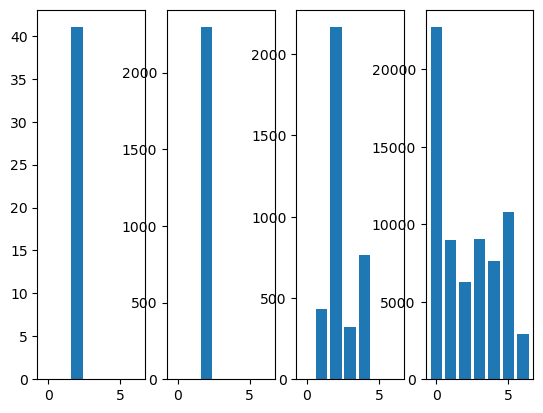

In [ ]:
ranks = np.unique(df_train['page_rank'])
labels = np.unique(df_train['label'])

fig, ax = plt.subplots(1,len(ranks))
for h,i in enumerate(ranks):
  mask = df_train['page_rank'] == i
  arr = df_train.values[mask, 6]
  count = Counter(arr)
  counts = []
  for j in labels:
    counts.append(count[j])
  ax[h].bar(labels, counts)

  ## bisogna evitare overfitting!! non so se nel loro dataset saranno colonne significative
  # non c'entra! al massimo devo decidree se togliere le righe


In [16]:
from collections import Counter

print(Counter(df_train.values[df_train['title'] == 'world in brief', 6]))
Counter(df_train.values[df_train['title'] == "the nation's weather", 6])



Counter({0: 30, 5: 9, 3: 1})


Counter()

In [5]:
df_train["text"] = df_train["title"].fillna("") + " " + df_train["title"].fillna("") + " " + df_train["article"].fillna("")

X = df_train["text"]
y = df_train["label"]

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer(
    stop_words="english",
    #sublinear_tf= True,
    #strip_accents= "unicode",
    ngram_range=(1, 2),
    lowercase= True,
    min_df=5,
    max_df=0.9,
    max_features= 50000
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf   = tfidf.transform(X_val)

In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    C=1.0,                   # regolarizzazione standard
    solver="saga",
    max_iter=300,
    class_weight="balanced", # utile per classi rare
    multi_class="multinomial"
)

#andrebbero scalati i dati, lo fa già vectorizer


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn . model_selection import ParameterGrid
params = {
"max_depth": [ None , 2 , 4 , 8] ,
"splitter": [ "best" , "random" ]
}

accuracies = []
for config in ParameterGrid(params):
  clf = DecisionTreeClassifier (** config )
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print("accuracy", accuracy_score(y_test, y_pred))
  print("precision", precision_score(y_test, y_pred, average=None))
  print("recall", recall_score(y_test, y_pred, average=None))
  print("f1", f1_score(y_test, y_pred, average=None))
  print()

<BarContainer object of 7 artists>

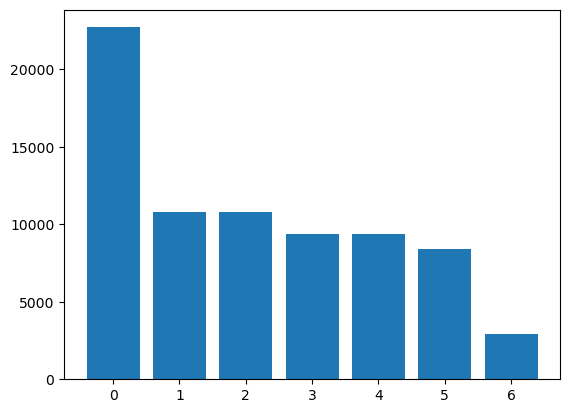

In [32]:
a = np.arange(0,7)
b = np.array([22721,10828,10766,9405,9346,8423,2891])
plt.bar(a,b)

In [ ]:
y_val

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

def f1_macro_scorer(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

clf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42, n_jobs=-1, warm_start=True, oob_score=f1_macro_scorer)
clf.fit(X_train_tfidf, y_train)



np.float64(0.8936238422439313)

In [30]:
y_pred = clf.predict(X_val_tfidf)
f1 = f1_score(y_val, y_pred, average='macro')
f1

np.float64(0.6061586307883596)

In [7]:
X_train_tfidf.shape

(59504, 5000)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3000)
x_train_tfifd = pca.fit_transform(X_train_tfidf)
X_val_tfidf = pca.transform(X_val_tfidf)
print(tfidf.get_feature_names_out())

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression

params = {
    "C": [1e-3, 0.01, 0.1, np.inf],
    "penalty": ["l2",'l1'],
    "solver": ["saga"],
    "max_iter": [800],
    "tol": [1e-3],
    "class_weight": ["balanced"], # utile per classi rare
    "multi_class": ["multinomial"],
    "warm_start": [True]
    }

accuracies = []
for i, config in enumerate(ParameterGrid(params)):
    print(i)
    logreg = LogisticRegression(**config)
    logreg.fit(X_train_tfidf, y_train)
    y_pred = logreg.predict(X_val_tfidf)
    f1 = f1_score(y_val, y_pred, average='macro')
    accuracies.append([config, f1])


In [12]:
from skopt import BayesSearchCV

In [ ]:
param_space = {
  "n_estimators": [100],
    "max_depth": [100],
    "random_state": [42],
    "criterion": ["gini", "entropy", "log_loss"],
    #"oob_score": [f1_score(y_val, y_test)],
    "n_jobs": [-1],
    "warm_start": [True]
}

opt = BayesSearchCV(
    RandomForestClassifier(),
    param_space,
    n_iter=32,
    cv=3
)
opt.fit(X_train_tfidf, y_train)

In [ ]:
BayesSearchCV(RandomForestClassifier(), param_space, )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

df_train = pd.read_csv("./development.csv")
df_test = pd.read_csv("./evaluation.csv")
df_train.dropna(inplace=True)
'''
df_train['title'] = df_train['title'].str.strip()
df_train['title'] = df_train['title'].str.casefold()
df_train['title'] = df_train['title'].str.removesuffix("\\n")

df_train['article'] = df_train['article'].str.strip()
df_train['article'] = df_train['article'].str.casefold()
df_train['article'] = df_train['article'].str.removesuffix("\\n")
df_train['article'] = df_train['article'].str.removesuffix("\\ \\")
'''
pd.DataFrame.drop_duplicates(df_train, subset='article', inplace=True)

df_train["text"] = df_train["title"].fillna("") + " " + df_train["title"].fillna("") + " " + df_train["article"].fillna("")

X = df_train["text"]
y = df_train["label"]

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer(
    stop_words="english",
    #sublinear_tf= True,
    #strip_accents= "unicode",
    ngram_range=(1, 2),
    lowercase= True,
    min_df=5,
    max_df=0.9,
    max_features= 7000
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf   = tfidf.transform(X_val)


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [24]:
A = tfidf.fit_transform(X, y)


In [ ]:
torch.tensor(A.todense())